In [304]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt


In [305]:
rate = 0.05
nper = 5
pmt = 0
pv = 120000
price = npf.fv(rate, nper, pmt, -pv)

In [306]:
print(f'Orientacyjna cena mieszkania za 5 lat to: {price:,.2f} PLN')

Orientacyjna cena mieszkania za 5 lat to: 153,153.79 PLN


In [307]:
periods = np.arange(1,nper+1,dtype=int)
apartments_price = - np.around(npf.fv(rate,periods,nper,pv),2)
apartments_price
# Co poszło tu nie tak?

array([126005.  , 132310.25, 138930.76, 145882.3 , 153181.42])

In [308]:
rate = 0.12
fv = price
nper = 60
pv = 0


In [309]:
print(f'Każdego miesiąca trzeba wpłacać orientacyjnie {npf.pmt(rate/12,nper,pv,-fv):,.2f} PLN')

Każdego miesiąca trzeba wpłacać orientacyjnie 1,875.28 PLN


In [310]:
payment = npf.pmt(rate/12,nper,pv,-fv)
rate = 0.12/12
periods = np.arange(1,nper+1,dtype=int)
intrests = - np.around(npf.ipmt(rate,periods,nper,fv),2)
np.sort(intrests)
savings = np.sort(intrests + payment)
np.cumsum(savings)
#Co poszło tu nie tak?

array([  1909.01353879,   3851.42707758,   5826.90061636,   7835.11415515,
         9875.74769394,  11948.47123273,  14052.97477152,  16188.93831031,
        18356.05184909,  20554.00538788,  22782.49892667,  25041.22246546,
        27329.87600425,  29648.16954304,  31995.81308182,  34372.50662061,
        36777.9701594 ,  39211.91369819,  41674.05723698,  44164.12077577,
        46681.82431455,  49226.89785334,  51799.07139213,  54398.07493092,
        57023.64846971,  59675.5220085 ,  62353.43554728,  65057.13908607,
        67786.37262486,  70540.87616365,  73320.40970244,  76124.72324123,
        78953.56678001,  81806.7003188 ,  84683.88385759,  87584.87739638,
        90509.44093517,  93457.35447396,  96428.37801274,  99422.28155153,
       102438.83509032, 105477.82862911, 108539.0221679 , 111622.20570669,
       114727.16924547, 117853.68278426, 121001.53632305, 124170.51986184,
       127360.43340063, 130571.05693942, 133802.1904782 , 137053.63401699,
       140325.17755578, 1

Text(0, 0.5, 'Wartość')

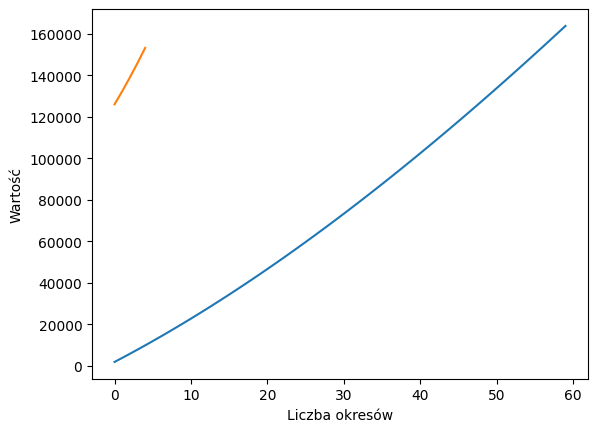

In [311]:
plt.plot(savings.cumsum(), label = 'Lokata')
plt.plot(apartments_price, label = "Cena mieszkania")
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość')
#Pytanie jak zgrać okresy  - czy robić symulację ceny mieszkania w ujęciu miesięcznym?